In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns #Plotting the data
from sklearn.linear_model import LogisticRegression # Importing Log Reg method from Sk Learn
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split # To split the data into Training and testing data
from sklearn.metrics import accuracy_score # Model Measures
from sklearn import metrics # Model Measures
from sklearn.metrics import roc_auc_score # ROC Score
from sklearn.metrics import roc_curve # ROC curve 
from sklearn.feature_selection import RFE # Feature selection 
from sklearn.metrics import classification_report # Confusion Matrix along with Precision and Recall scores
from sklearn.metrics import confusion_matrix # Confusion Matrix
import statsmodels.api as sm # Stat Models to develop the linear and log reg models


In [2]:
os.chdir('E:\\data science\\Mojotics\\Guide\\C7\\Statistics\\Topic 2 - Logistics Regression')

In [3]:
data = pd.read_csv('GermanCredit.csv')

In [4]:
print (data.info())
print (data.shape)
print(data.isnull().sum())
(data.describe(include = 'all').T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
Duration                                  1000 non-null int64
Amount                                    1000 non-null int64
InstallmentRatePercentage                 1000 non-null int64
ResidenceDuration                         1000 non-null int64
Age                                       1000 non-null int64
NumberExistingCredits                     1000 non-null int64
NumberPeopleMaintenance                   1000 non-null int64
Telephone                                 1000 non-null int64
ForeignWorker                             1000 non-null int64
Class                                     1000 non-null object
CheckingAccountStatus.lt.0                1000 non-null int64
CheckingAccountStatus.0.to.200            1000 non-null int64
CheckingAccountStatus.gt.200              1000 non-null int64
CheckingAccountStatus.none                1000 non-null int64
CreditHistory.NoCredit.Al

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Duration,1000,NaN,NaN,NaN,20.903,12.0588,4,12,18,24,72
Amount,1000,NaN,NaN,NaN,3271.26,2822.74,250,1365.5,2319.5,3972.25,18424
InstallmentRatePercentage,1000,NaN,NaN,NaN,2.973,1.11871,1,2,3,4,4
ResidenceDuration,1000,NaN,NaN,NaN,2.845,1.10372,1,2,3,4,4
Age,1000,NaN,NaN,NaN,35.546,11.3755,19,27,33,42,75
NumberExistingCredits,1000,NaN,NaN,NaN,1.407,0.577654,1,1,1,2,4
NumberPeopleMaintenance,1000,NaN,NaN,NaN,1.155,0.362086,1,1,1,1,2
Telephone,1000,NaN,NaN,NaN,0.596,0.490943,0,0,1,1,1
ForeignWorker,1000,NaN,NaN,NaN,0.963,0.188856,0,1,1,1,1
Class,1000,2,Good,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe( percentiles = [ 0.1,0.9,0.95, 0.99 ],include = 'all' ).T

,count,unique,top,freq,mean,std,min,10%,50%,90%,95%,99%,max
Duration,1000,NaN,NaN,NaN,20.903,12.0588,4,9,18,36,48,60,72
Amount,1000,NaN,NaN,NaN,3271.26,2822.74,250,932,2319.5,7179.4,9162.7,14180.4,18424
InstallmentRatePercentage,1000,NaN,NaN,NaN,2.973,1.11871,1,1,3,4,4,4,4
ResidenceDuration,1000,NaN,NaN,NaN,2.845,1.10372,1,1,3,4,4,4,4
Age,1000,NaN,NaN,NaN,35.546,11.3755,19,23,33,52,60,67.01,75
NumberExistingCredits,1000,NaN,NaN,NaN,1.407,0.577654,1,1,1,2,2,3,4
NumberPeopleMaintenance,1000,NaN,NaN,NaN,1.155,0.362086,1,1,1,2,2,2,2
Telephone,1000,NaN,NaN,NaN,0.596,0.490943,0,0,1,1,1,1,1
ForeignWorker,1000,NaN,NaN,NaN,0.963,0.188856,0,1,1,1,1,1,1
Class,1000,2,Good,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def describe(data, stats):
    d = data.describe()
    return d.append(data.reindex_axis(data.columns, 1).agg(stats))

describe(data,['skew', 'mad', 'kurt']).T

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,count,mean,std,min,25%,50%,75%,max,skew,mad,kurt
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0,1.020739,9.026096,0.595780
Amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0,1.949628,2048.541528,4.292590
CheckingAccountStatus.0.to.200,1000.0,0.269,0.443662,0.0,0.0,0.0,1.00,1.0,1.043420,0.393278,-0.913104
CheckingAccountStatus.gt.200,1000.0,0.063,0.243085,0.0,0.0,0.0,0.00,1.0,3.602662,0.118062,11.001175
CheckingAccountStatus.lt.0,1000.0,0.274,0.446232,0.0,0.0,0.0,1.00,1.0,1.014956,0.397848,-0.971813
CheckingAccountStatus.none,1000.0,0.394,0.488879,0.0,0.0,0.0,1.00,1.0,0.434514,0.477528,-1.814831
Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditHistory.Critical,1000.0,0.293,0.455366,0.0,0.0,0.0,1.00,1.0,0.910980,0.414302,-1.172464
CreditHistory.Delay,1000.0,0.088,0.283437,0.0,0.0,0.0,0.00,1.0,2.913001,0.160512,6.498569
CreditHistory.NoCredit.AllPaid,1000.0,0.040,0.196057,0.0,0.0,0.0,0.00,1.0,4.701911,0.076800,20.148261


In [7]:
data.columns

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'Class', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other',
       'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to

In [8]:
data['Class'].replace('Bad',0,inplace=True)
data['Class'].replace('Good',1,inplace=True)

data['Class'].unique()

array([1, 0], dtype=int64)

In [9]:
y= data['Class']
X = data.drop(['Class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [10]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_test))
print(np.shape(y_train))

(700, 61)
(300, 61)
(300,)
(700,)


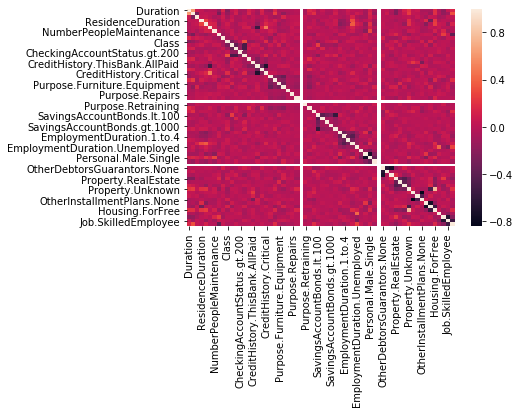

In [11]:
data.corr()
sns.heatmap(data.corr())

In [12]:
for i in range(X.shape[1]):
    print(variance_inflation_factor(X.values, i))

2.049053168717432
2.5503528578366135
1.3863169713398449
1.3441761520826068
1.470060886610261
1.6485341579893416
1.1945940137379525
1.3331741631814347
1.116882029777661
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)



inf
inf
inf
inf
inf
inf
nan
inf
inf
inf
inf
inf
inf

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss



inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
nan
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf


In [13]:
X_train.columns

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other',
       'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to.4', 'Emp

In [14]:
result1 = pd.DataFrame(X_train.columns)

In [15]:
result1.rename(columns = {'0':'cols'}, inplace = True)

In [16]:
result1

,0
0,Duration
1,Amount
2,InstallmentRatePercentage
3,ResidenceDuration
4,Age
5,NumberExistingCredits
6,NumberPeopleMaintenance
7,Telephone
8,ForeignWorker
9,CheckingAccountStatus.lt.0


In [17]:
from sklearn.metrics import r2_score
VIF = []
for i in X_train.columns:
    y=X_train[i]
    X_train_train = X_train.drop(i,axis = 1)
    
    lm = LinearRegression()
    lm.fit(X_train_train,y)
    y_pred=lm.predict(X_train_train)
    
    VIF.append(1 / (1-r2_score(y,y_pred)))

result1['VIF'] = VIF

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launche

In [18]:
result1

,0,VIF
0,Duration,2.098066
1,Amount,2.581390
2,InstallmentRatePercentage,1.373718
3,ResidenceDuration,1.334637
4,Age,1.494995
5,NumberExistingCredits,1.627969
6,NumberPeopleMaintenance,1.214472
7,Telephone,1.366284
8,ForeignWorker,1.109994
9,CheckingAccountStatus.lt.0,inf


In [19]:
data.columns

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'Class', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other',
       'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to

In [20]:
pd.crosstab(data['Purpose.Education'],data['Class'])

Class,0,1
Purpose.Education,,
0,278,672
1,22,28


In [21]:
cross=pd.crosstab(data['Purpose.Education'],data['Class'])

In [22]:
cross.columns = ['Bad','Good']

In [23]:
cross

,Bad,Good
Purpose.Education,,
0,278,672
1,22,28


In [24]:
cross['Total'] = cross['Bad'] + cross['Good']

In [25]:
cross

,Bad,Good,Total
Purpose.Education,,,
0,278,672,950
1,22,28,50


In [26]:
cross['Dist_Good'] = cross['Good'] / cross['Good'].sum()

In [27]:
cross

,Bad,Good,Total,Dist_Good
Purpose.Education,,,,
0,278,672,950,0.96
1,22,28,50,0.04


In [28]:
cross['Dist_Bad'] = cross['Bad'] / cross['Bad'].sum()

In [29]:
cross

,Bad,Good,Total,Dist_Good,Dist_Bad
Purpose.Education,,,,,
0,278,672,950,0.96,0.926667
1,22,28,50,0.04,0.073333


In [30]:
cross['WOE'] = np.log(cross['Dist_Good']/cross['Dist_Bad'])

In [31]:
cross

,Bad,Good,Total,Dist_Good,Dist_Bad,WOE
Purpose.Education,,,,,,
0,278,672,950,0.96,0.926667,0.035339
1,22,28,50,0.04,0.073333,-0.606136


In [32]:
cross['IV'] = cross['WOE'] * ( cross['Dist_Good'] - cross['Dist_Bad'] )

In [33]:
cross

,Bad,Good,Total,Dist_Good,Dist_Bad,WOE,IV
Purpose.Education,,,,,,,
0,278,672,950,0.96,0.926667,0.035339,0.001178
1,22,28,50,0.04,0.073333,-0.606136,0.020205


In [34]:
np.round(cross['IV'].sum(),3)

0.021

In [35]:
IV = []

for i in X_train.columns:
    cross=pd.crosstab(data[i],data['Class'])
    cross.columns = ['Bad','Good']
    cross['Total'] = cross['Bad'] + cross['Good']
    cross['Dist_Good'] = cross['Good'] / cross['Good'].sum()
    cross['Dist_Bad'] = cross['Bad'] / cross['Bad'].sum()
    cross['WOE'] = np.log(cross['Dist_Good']/cross['Dist_Bad'])
    cross['IV'] = cross['WOE'] * ( cross['Dist_Good'] - cross['Dist_Bad'] )
    
    IV.append(np.round(cross['IV'].sum(),3))
    
result1['IV'] = IV

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [36]:
result1.head()

,0,VIF,IV
0,Duration,2.098066,inf
1,Amount,2.581390,inf
2,InstallmentRatePercentage,1.373718,0.026
3,ResidenceDuration,1.334637,0.004
4,Age,1.494995,inf


In [37]:
def checkiv(i):
    cross=pd.crosstab(data[i],data['Class'])
    cross.columns = ['Bad','Good']
    cross['Total'] = cross['Bad'] + cross['Good']
    cross['Dist_Good'] = cross['Good'] / cross['Good'].sum()
    cross['Dist_Bad'] = cross['Bad'] / cross['Bad'].sum()
    cross['WOE'] = np.log(cross['Dist_Good']/cross['Dist_Bad'])
    cross['IV'] = cross['WOE'] * ( cross['Dist_Good'] - cross['Dist_Bad'] )
    
    return cross

In [38]:
X_train['age_bins'] = pd.cut(x=X_train['Age'], bins=[19,24, 28, 32, 38,45,60,75])

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
X_train['age_bins'].head()

731    (19, 24]
716    (38, 45]
640    (24, 28]
804    (19, 24]
737    (32, 38]
Name: age_bins, dtype: category
Categories (7, interval[int64]): [(19, 24] < (24, 28] < (28, 32] < (32, 38] < (38, 45] < (45, 60] < (60, 75]]

In [40]:
X_train.drop('age_bins',axis = 1,inplace = True)

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [41]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred_log = logreg.predict(X_test)

In [43]:
confusion_matrix = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix)

[[ 35  51]
 [ 23 191]]


In [44]:
accuracy_LOG = accuracy_score(y_test, y_pred_log)
accuracy_LOG

0.7533333333333333

In [45]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.60      0.41      0.49        86
           1       0.79      0.89      0.84       214

    accuracy                           0.75       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.74      0.75      0.74       300



In [46]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

logit_roc_auc

0.649750054336014

In [47]:
probs = pd.DataFrame()
y_pred_prob = logreg.predict_proba(X_test)

probs['y_pred_prob1'] = y_pred_prob[:,1]
print(y_pred_prob1)

probs['y_pred_prob0'] = y_pred_prob[:,0]
print(y_pred_prob0)

NameError: name 'y_pred_prob1' is not defined

In [ ]:
probs['y_test'] = list(y_test)

In [ ]:
probs.head()

In [ ]:
probs['DECILE'] = pd.qcut(probs['y_pred_prob1'],10, labels=False)

In [ ]:
result2 = pd.crosstab(probs['DECILE'],probs['y_test'])
result2

In [ ]:
result2['% of 0'] = (result2[0] / result2[0].sum()) * 100

result2['% of 1'] = (result2[1] / result2[1].sum()) * 100

result2['Cum % of 0'] = result2['% of 0'].cumsum()
result2['Cum % of 1'] = result2['% of 1'].cumsum()
result2['KS'] = abs(result2['Cum % of 1'] - result2['Cum % of 0'])

for i in result2.index:
    print(float(result2.loc[i,'KS']))

In [ ]:
probs[probs.DECILE == 3].y_pred_prob1.min()

In [ ]:
probs['KS_value'] = np.where(probs['y_pred_prob1'] >= 0.6081290442160743,1,0)

In [ ]:
pd.crosstab(probs.y_test,probs.KS_value)

In [ ]:
print(classification_report(probs.y_test,probs.KS_value))

In [ ]:
logreg1 = LogisticRegression()
rfe = RFE(logreg1, 25)
rfe = rfe.fit(X_train,y_train)

In [ ]:
y_pred_rfe = rfe.predict(X_test)
print(type(y_pred_rfe))

y_pred_rfe = pd.Series(y_pred_rfe)

print(type(y_pred_rfe))

In [ ]:
print(classification_report(y_test,y_pred_rfe))

In [ ]:
probs1 = pd.DataFrame()
y_pred_rfe_prob = rfe.predict_proba(X_test)

probs1['y_pred_rfe_prob1'] = y_pred_rfe_prob[:,1]
print(probs1)

In [ ]:
probs1['y_test'] = list(y_test)

probs1['DECILE'] = pd.qcut(probs1['y_pred_rfe_prob1'],10, labels=False)

probs1.head()

In [ ]:
result3 = pd.crosstab(probs1['DECILE'],probs1['y_test'])

result3['% of 0'] = (result3[0] / result3[0].sum()) * 100

result3['% of 1'] = (result3[1] / result3[1].sum()) * 100

result3['Cum % of 0'] = result3['% of 0'].cumsum()
result3['Cum % of 1'] = result3['% of 1'].cumsum()
result3['KS'] = abs(result3['Cum % of 1'] - result3['Cum % of 0'])

print(result3.head())

for i in result3.index:
    print(float(result3.loc[i,'KS']))

In [ ]:
probs1[probs1.DECILE==3].y_pred_rfe_prob1.min()

In [ ]:
probs1['KS_value'] = np.where(probs1['y_pred_rfe_prob1'] >= 0.6395204777280135,1,0)

probs1.head()

In [ ]:
print(classification_report(probs1.y_test,probs1.KS_value))